# Project Google Team


*   Thomas Okoro
*   Etra
*   Carolina




# Project introduction

## **Real or Not? NLP with Disaster Tweets**

People often use Tweeter when something happen. They use their smartphone 
to announce an emergency they’re observing in real-time. In this project, we are interested in the sentiment analysis in order to predict if a given tweet is a real disaster or not.

Things are not always clear whether a person’s words are actually announcing a disaster or not. Take this example available on :https://www.kaggle.com/c/nlp-getting-started

<div>
<img src="https://storage.googleapis.com/kaggle-media/competitions/tweet_screenshot.png" width="500"/>
</div>

Here the author use the word Ablaze, for human it is clear that is it a methaphor but it's less clear for machine. It is difficult for human (almost impossible) to read thousand of tweet and classify them into category but with machine learning and the use of "natural language processing" libraries, machine can learn about the meaning of a given Tweet.
This is the purpose of this challenge.


# Data

In this project, 2 datasets are provided: 

One of them contain Tweets and are labeled  

 1. The first one (training set) contain labeled Tweets (we know if this Tweet refer to a real disaster or not)
 2. The second one (test set) contain unlabeled Tweets




# Dataset importation and vizualisation

In [1]:
# Import dataset from github repository
url_train = 'https://raw.githubusercontent.com/ThomasOkoro/DM_Project_Google/main/Data/training_data.csv' #git url of the training set
url_test = 'https://raw.githubusercontent.com/ThomasOkoro/DM_Project_Google/main/Data/test_data.csv' #git url of the training set

In [2]:
#importing pandas 
import pandas as pd 

In [3]:

df_train=pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

df_train.head()



,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1


In [4]:
#import repository
!git clone 'https://github.com/ThomasOkoro/DM_Project_Google.git' #copying from github into the destination directory
!ls

Cloning into 'DM_Project_Google'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 125 (delta 66), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (125/125), 494.85 KiB | 1.01 MiB/s, done.
Resolving deltas: 100% (66/66), done.
DM_Project_Google  sample_data


We can see that this training set is labeled and we know if a given Tweets refer to a real disaster or not by looking at the value of the target column.



*   target = 1 --> disaster
*   target = 0 --> not a disaster

The keyword refer to the word thats seem the most important in the Tweet it like the word "ABLAZE" in the introduction.



In [5]:
df_train.head()

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1


In [6]:
df_test.head()

# in this set there is no target, we have to predict it

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball


# EDA / Data viualization

In [7]:
#import matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


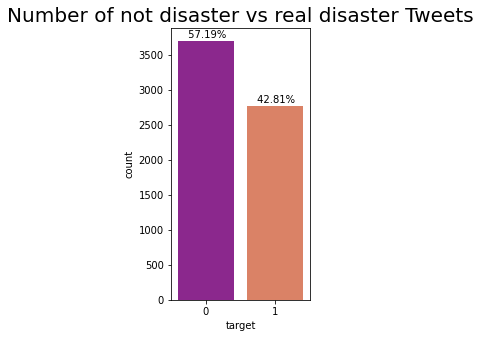

In [8]:
# Barchart of the target repartition (0 or 1)
plt.figure(figsize=(2.5,5))
plt.title("Number of not disaster vs real disaster Tweets", fontsize='20')
p1 = sns.countplot(df_train['target'], palette = 'plasma')

for p in p1.patches:
        p1.annotate('{:6.2f}%'.format(p.get_height()/len(df_train['target'])*100), (p.get_x()+0.1, p.get_height()+50))
        
plt.show()

# Base Rate

The base rate represent the frequency of the most common class. Meaning that if we use a naive classifer where we just classify each Tweets in the "not a disaster" class, we will be correct with:

In [9]:

#Base rate
base_rate = max(len(df_train[df_train["target"]==0])/len(df_train),len(df_train[df_train["target"]==1])/len(df_train))
print( 'The base rate is '"{:.2%}".format(base_rate))

The base rate is 57.19%


**The accuracy of a model should at least beat the base rate in order to be considered**

#Visualization

## Top 10 keywors mostly use in each category

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Disaster Tweets')

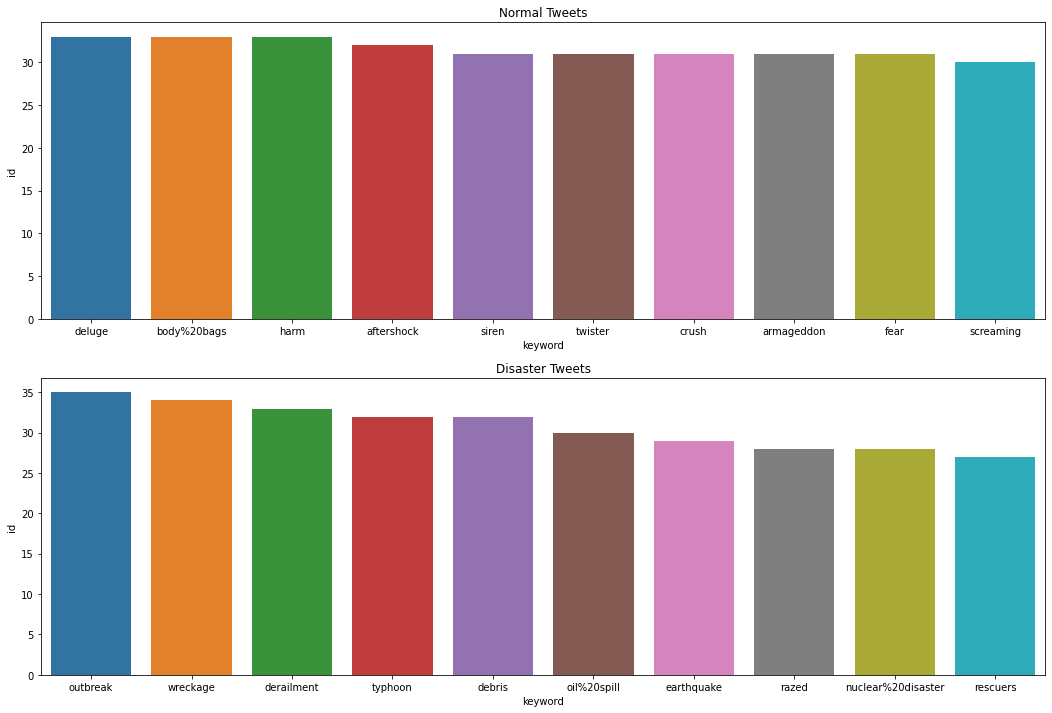

In [10]:
# top 10 keywords mostly use in each category
fig,axes= plt.subplots(2,1,figsize=(18,12))

temp = pd.DataFrame(df_train[df_train['target']==0].groupby('keyword')['id'].count())
temp.sort_values('id',ascending=False,inplace=True)
sns.barplot(temp.index[:10],temp['id'][:10],ax=axes[0]).set_title('Normal Tweets')


temp = pd.DataFrame(df_train[df_train['target']==1].groupby('keyword')['id'].count())
temp.sort_values('id',ascending=False,inplace=True)
sns.barplot(temp.index[:10],temp['id'][:10],ax=axes[1]).set_title('Disaster Tweets')


## Top 10 most used hashtag in each category

Hashtags are used in social media content indexing. It allows to search more efficently by using keywords on Tweeter. 

In [11]:
# import nltk
import nltk
from nltk.probability import FreqDist
import re

In [12]:
# hashtag extraction

def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

HT_regular = hashtag_extract(df_train['text'][df_train['target'] == 0])

HT_disaster = hashtag_extract(df_train['text'][df_train['target'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_disaster = sum(HT_disaster,[])

Text(0.5, 1.0, 'Disaster Tweets')

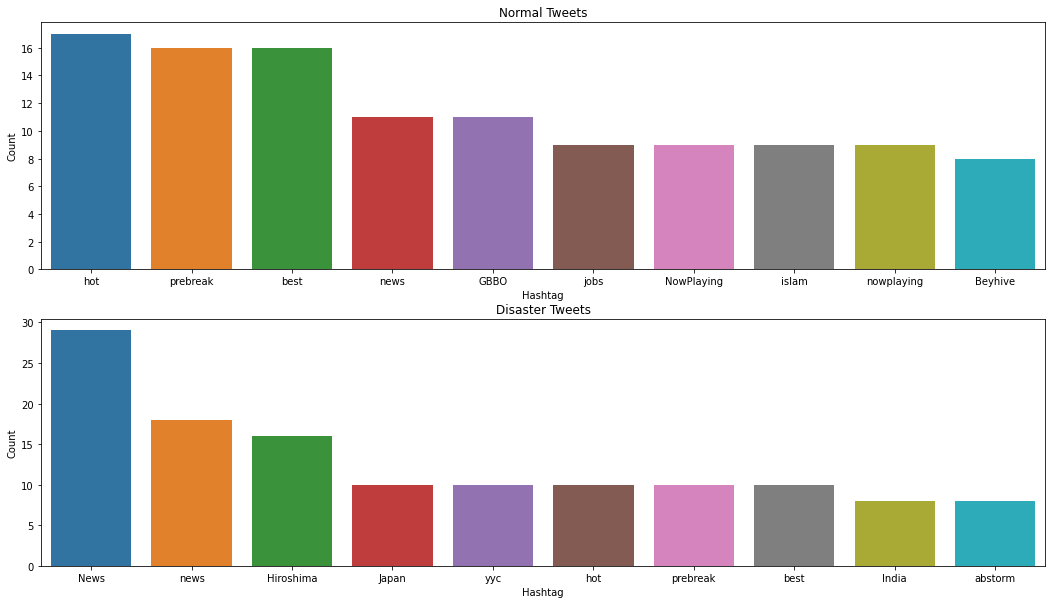

<Figure size 1152x360 with 0 Axes>

<Figure size 1152x360 with 0 Axes>

In [13]:
# plot hashtag frequency 

fig,axes = plt.subplots(2,1,figsize=(18,10))

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
sns.barplot(data=d, x= "Hashtag", y = "Count",ax=axes[0]).set_title('Normal Tweets')


a = nltk.FreqDist(HT_disaster)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
sns.barplot(data=d, x= "Hashtag", y = "Count",ax=axes[1]).set_title('Disaster Tweets')


# 3. Data Cleaning 

In this part, the goal is to convert text into something the machine will be able to understand. This is called text reprocessing and it exist many python libraries that we can use. We choose to use spacy.

In [14]:
!pip install -U spacy

     |████████████████████████████████| 10.4MB 10.5MB/s 
     |████████████████████████████████| 1.1MB 43.1MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


## Tokenization

Tokenization allow us to represent text as token :

<div>
<img src="https://www.kdnuggets.com/wp-content/uploads/text-tokens-tokenization-manning.jpg" width="500"/>
</div>


source: https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html

##  Lemmatization vs Stemmatization

<div>
<img src="https://miro.medium.com/max/840/1*ES5bt7IoInIq2YioQp2zcQ.png" width="500"/>
</div>

"Lemmatization is similar to stemming with one difference i.e. the final form is also a meaningful word. Thus, stemming operation does not need a dictionary like lemmatization. So, depending on the constraints one have, stemming may be a less memory intensive option for us to consider."

sources : https://medium.com/swlh/introduction-to-stemming-vs-lemmatization-nlp-8c69eb43ecfe



## Stop words
Stop words are common words used in a language that does not provide any useful information. Removing stopwords are very useful because it reduce noise, and therefore improve accuracy. Fortunately, in spacy library we have already a list of stopwords that can be used.

In [15]:
# import spacy

import spacy
from spacy.lang.en.stop_words import STOP_WORDS #import english stopwords
from spacy.lang.en import English #import english dict
import string

In [16]:
# Create a list of stopwords if it shows an error please go to exceution--> redémarrer et tout exécuter

stop_words = spacy.lang.en.stop_words.STOP_WORDS



## Punctuation

punctuations does not add any information that's why it is important to remove it from the Tweet in order to improve accuracy. 

In [17]:
# Create a list of punctuation marks
punctuations = string.punctuation

print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## Define the first cleaning function using spacy
The target is to create a function that will do the follow taks :


1.   Tonkenize tweets
2.   Element Lemmatize tweets
3.   Remove stop words
4.   Remove punctuations




In [18]:
!pip install spellchecker pyspellchecker

     |████████████████████████████████| 3.9MB 12.3MB/s 
     |████████████████████████████████| 1.9MB 45.1MB/s 
  Created wheel for spellchecker: filename=spellchecker-0.4-cp36-none-any.whl size=3966516 sha256=e3b1e712ed10fe736b9b0ffe00b089233e6f75c6e0b42d90946e4b15c3486ee1
  Stored in directory: /root/.cache/pip/wheels/a2/e6/ad/28ab959cba7100f5c562a3d1711cd34b630734d241c4e1bd40
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-cp36-none-any.whl size=7113 sha256=dd740445b1acdc6a29e41e730b5ab9cdb250a775dd1574d7379f8a176913b55f
  Stored in directory: /root/.cache/pip/wheels/58/e0/c1/e3fed0e9fd1a3708bc91870fb0ba30ef88527540006763674b
  Created wheel for soundex: filename=soundex-1.1.3-cp36-none-any.whl size=8862 sha256=9c102de2b1ba88b2d7a9351bf11154bce5e3ffd10908d246324e79d7cb4f0e49
  Stored in directory: /root/.cache/pip/wheels/b5/bb/e6/9a4b6be56c40aa707509bddaf6d414187461ded9db7a25a41a
  Created wheel for silpa-common: filename=silpa_common-0.3-cp36-none-any.whl size=8452 

In [22]:
from spellchecker import SpellChecker

# Load English language model
sp = spacy.load('en_core_web_sm')

# Create tokenizer function
def spacy_tokenizer(sentence):
    clean_word = sentence.encode('ascii',errors='ignore').decode('ascii')

    # remove html
    clean_word = re.sub(r'<.*?>', "", clean_word)
    
    # remove hashtags
    clean_word = re.sub(r'#', "", clean_word)

    # Lowercase
    clean_word = clean_word.lower()

    # spell checking
    #spell_checker = SpellChecker()
    #clean_word_spellchecked = []
    #for word in clean_word.split():
        #clean_word_spellchecked.append(spell_checker.correction(word))

    # Create token object, which is used to create documents with linguistic annotations.
    #mytokens = sp(' '.join(clean_word_spellchecked))
    
    mytokens = sp(' '.join(clean_word))
    
    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    mytokens = ' '.join(mytokens)
    
    # Return preprocessed list of tokens
    return mytokens


/usr/local/lib/python3.6/dist-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.5) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [23]:
# Clean data
df_train.text = df_train.text.apply(lambda x: spacy_tokenizer(x))
df_test.text = df_test.text.apply(lambda x: spacy_tokenizer(x))

## Stemming
We used stemming to clean our data, to clean slang words but decided to not use this since our accuracy dropped to a level of 0.78

In [24]:
#Stemmatization
import snowballstemmer

stemmer = snowballstemmer.stemmer('english');
print(stemmer.stemWords("We are the world".split()));

['We', 'are', 'the', 'world']


def spacy_tokenizer(text):

        """
        Tokenizes sequences of text and stems the tokens
        :param text: String to tokenize
        :return: List with stemmed tokens
        """
        tokens = nltk.WhitespaceTokenizer().spacy_tokenizer(text)
        tokens = list(set(re.sub("[^a-zA-Z\']", "", token) for token in tokens))
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = list(set(re.sub("[^a-zA-Z]", "", token) for token in tokens))
        stems = []
        stemmer = SnowballStemmer("english")
        for token in tokens:
            token = stemmer.stem(token)
            if token != "":
                stems.append(token)
        return stems

        

## TF-IDF vectors

<div>
<img src="https://www.researchgate.net/profile/Haider_Al-Khateeb2/publication/291950178/figure/fig1/AS:330186932408324@1455734107458/Term-Frequency-Inverse-Document-Frequency-TF-IDF.png" width="500"/>
</div>

source:https://www.researchgate.net/figure/Term-Frequency-Inverse-Document-Frequency-TF-IDF_fig1_291950178

After text cleaning, we use vectorization technique in order to create vectors that can be understood by the machine. TF-IDF allows us to take into account frequent word that is relevant and give less importance to frequent words that appear frequently in the corpus. Moreover, we can therefore use somme regression model or other model since text become vectors of numbers. 

In [25]:
#TF-IDF feature vectors 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) # we use the spacy_tokenizer that we defined


# 4. Training using Logistic Model

<div>
<img src="https://miro.medium.com/max/768/0*gKOV65tvGfY8SMem.png" width="500"/>
</div>

source: https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7


In [26]:
#training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
LogisticRegression(solver="lbfgs", max_iter=1000, random_state=72)

# define X and Y traning set

df_X = df_train["text"]
df_Y = df_train["target"]

# Train test split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)






In [27]:
# Define classifier
classifier = LogisticRegression()
#import pipeline
from sklearn.pipeline import Pipeline
# Create pipeline we use pipeline to apply several data transformation here, vectorize then apply the classifier (logistic reg)
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...,
                                 tokenizer=<function spacy_tokenizer at 0x7f5d29aafbf8>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_i

# Model evaluation Logistic (submission 1)

We create an evaluation function in order to compute accuracy of any model

In [28]:
# y_pred_test on training set, we use the 20% of the traning set to test our model

y_pred = pipe.predict(X_test)

In [29]:
# Evaluate the model
def evaluate(true, pred):
    precision = precision_score(true, pred)
    recall = recall_score(true, pred)
    f1 = f1_score(true, pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

In [30]:
# Evaluation - training set
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[661  88]
 [390 156]]
ACCURACY SCORE:
0.6309
CLASSIFICATION REPORT:
	Precision: 0.6393
	Recall: 0.2857
	F1_Score: 0.3949


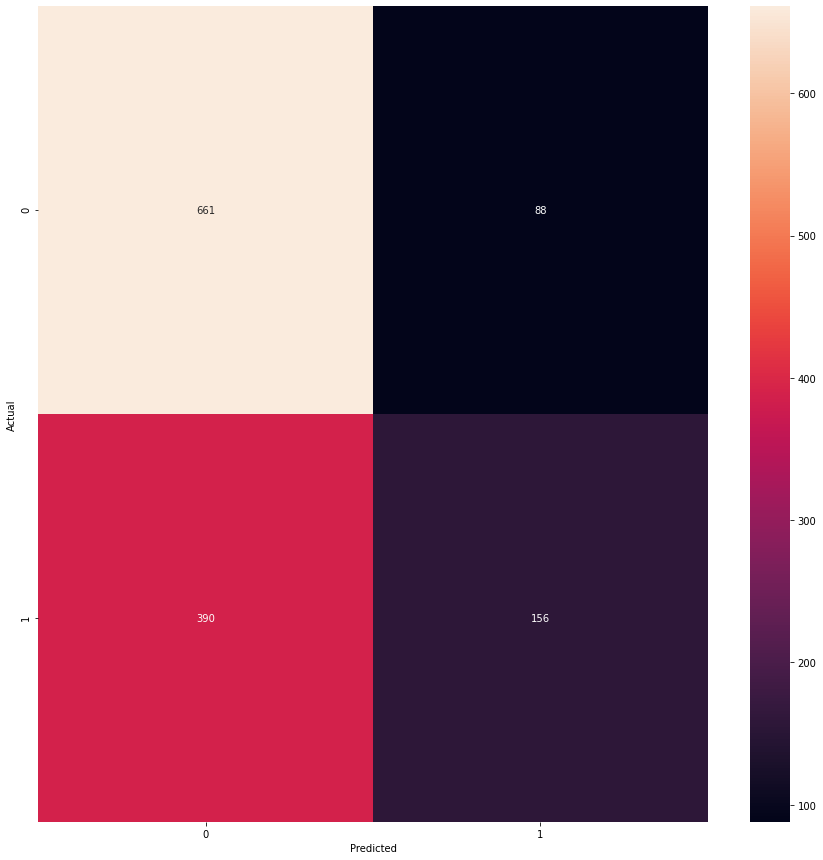

In [31]:
# Evaluate model confusion graph
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## First result 



In [32]:
accuracy = round(accuracy_score(y_test, y_pred), 4)
print(accuracy )

0.6309


## First submission, using non labeled dataset (submission 2)

In [33]:
# apply logistic reg to test data (non labeled)

df_X_test = df_test['text']



In [34]:
# apply model to test data
y_pred_test = pipe.predict(df_X_test)
y_pred_test.shape


(1142,)

In [35]:

y_pred_test.shape


(1142,)

In [36]:
# export the predicted target for submission 1
y_pred_test_df = pd.DataFrame(y_pred) # transfom into dataframe
y_pred_test_df.columns = ['target'] # set column name
y_pred_test_df.to_csv(r'/content/DM_Project_Google/Data/accuracy_0.csv', index = False)
y_pred_test_df.shape
y_pred_test_df.head()


,target
0,0
1,1
2,1
3,1
4,0


In [37]:
#git push
!git push 'https://github.com/ThomasOkoro/content/DM_Project_Google/Data/accuracy_0.csv' #push from github into the destination directory
!ls

fatal: not a git repository (or any of the parent directories): .git
DM_Project_Google  sample_data


# Accuracy Improvement






---





## Cross validation

Cross validation : we separed training set into N training part and run multiple regression. Cross validation can increase the accuracy of a model by that capturing most of the patterns from the data and by not picking up too much on the noise.

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1920px-K-fold_cross_validation_EN.svg.png" width="500"/>
</div>

sources: https://en.wikipedia.org/wiki/Cross-validation_(statistics)#/media/File:K-fold_cross_validation_EN.svg

In [38]:
# logistic reg with cross validation

from sklearn.linear_model import LogisticRegressionCV

# Define classifier
classifier = LogisticRegressionCV(cv=5, random_state=0)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<function spacy_tokenizer at 0x7f5d29aafbf8>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=5,
                                      dual=Fal

In [39]:
# test accuracy of this cv model
# Accuracy on test set
y_pred = pipe.predict(X_test)
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[574 175]
 [247 299]]
ACCURACY SCORE:
0.6741
CLASSIFICATION REPORT:
	Precision: 0.6308
	Recall: 0.5476
	F1_Score: 0.5863


## Model evalutation : Logistic + cross validation (submission 2)

In [40]:
# apply model to test data
y_pred_test_cv = pipe.predict(df_X_test)


In [41]:
# export the predicted target for submission 2
y_pred_test_df_cv = pd.DataFrame(y_pred_test_cv) # transfom into dataframe
y_pred_test_df_cv.columns = ['target'] # set column name
y_pred_test_df_cv.to_csv(r'/content/DM_Project_Google/Data/accuracy_1_cv.csv', index = False)
y_pred_test_df_cv.shape
y_pred_test_df_cv.head()

,target
0,0
1,0
2,1
3,1
4,0


# N-gram 



<div>
<img src="https://images.deepai.org/django-summernote/2019-04-11/f98290ce-a9e9-48c6-8330-4e9a5fe55331.png" width="500"/>
</div>

sources: https://deepai.org/machine-learning-glossary-and-terms/n-gram


N-grams technique are used to take into account of the word order in a sentence. We will try to define different pairs of N-grams and select the one which provide the best accuracy

In [42]:
# N-grams approach

# Create list of configs for N-grams
def configs():

    models = list()
    
    # Define config lists
    ngram_range = [(1,1), (1,2), (1, 3), (2, 2), (2, 3), (3, 3)]
    min_df = [1]
    max_df = [1.0]
    analyzer=['word', 'char']
    
    # Create config instances
    for n in ngram_range:
        for i in min_df:
            for j in max_df:
              for a in analyzer:
                    cfg = [n, i, j, a]
                    models.append(cfg)
    return models
configs = configs()
configs[:10]

[[(1, 1), 1, 1.0, 'word'],
 [(1, 1), 1, 1.0, 'char'],
 [(1, 2), 1, 1.0, 'word'],
 [(1, 2), 1, 1.0, 'char'],
 [(1, 3), 1, 1.0, 'word'],
 [(1, 3), 1, 1.0, 'char'],
 [(2, 2), 1, 1.0, 'word'],
 [(2, 2), 1, 1.0, 'char'],
 [(2, 3), 1, 1.0, 'word'],
 [(2, 3), 1, 1.0, 'char']]

## Apply the N-grams config using logistic regression

In [43]:
# Define list for result
result = []

for config in configs:

    # Redefine vectorizer
    tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=config[0],# we add n-gram in the pipe
                                   min_df=config[1], max_df=config[2], analyzer=config[3])

    # Define classifier
    classifier = LogisticRegression()

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Print accuracy on test set
    print("CONFIG: ", config)
    evaluate(y_test, y_pred)
    print("-----------------------")

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

CONFIG:  [(1, 1), 1, 1.0, 'word']
CONFUSION MATRIX:
[[661  88]
 [390 156]]
ACCURACY SCORE:
0.6309
CLASSIFICATION REPORT:
	Precision: 0.6393
	Recall: 0.2857
	F1_Score: 0.3949
-----------------------
CONFIG:  [(1, 1), 1, 1.0, 'char']
CONFUSION MATRIX:
[[661  88]
 [390 156]]
ACCURACY SCORE:
0.6309
CLASSIFICATION REPORT:
	Precision: 0.6393
	Recall: 0.2857
	F1_Score: 0.3949
-----------------------
CONFIG:  [(1, 2), 1, 1.0, 'word']
CONFUSION MATRIX:
[[623 126]
 [312 234]]
ACCURACY SCORE:
0.6618
CLASSIFICATION REPORT:
	Precision: 0.6500
	Recall: 0.4286
	F1_Score: 0.5166
-----------------------
CONFIG:  [(1, 2), 1, 1.0, 'char']
CONFUSION MATRIX:
[[623 126]
 [312 234]]
ACCURACY SCORE:
0.6618
CLASSIFICATION REPORT:
	Precision: 0.6500
	Recall: 0.4286
	F1_Score: 0.5166
-----------------------
CONFIG:  [(1, 3), 1, 1.0, 'word']
CONFUSION MATRIX:
[[630 119]
 [232 314]]
ACCURACY SCORE:
0.7290
CLASSIFICATION REPORT:
	Precision: 0.7252
	Recall: 0.5751
	F1_Score: 0.6415
-----------------------
CONFIG:  [

## Select config which maximize accuracy


In [44]:
# Convert result innto dataframe
result_df = pd.DataFrame(result)
result_df.columns = ['config', 'accuracy']
result_df.head(10)



,config,accuracy
0,"[(1, 1), 1, 1.0, word]",0.630888
1,"[(1, 1), 1, 1.0, char]",0.630888
2,"[(1, 2), 1, 1.0, word]",0.661776
3,"[(1, 2), 1, 1.0, char]",0.661776
4,"[(1, 3), 1, 1.0, word]",0.728958
5,"[(1, 3), 1, 1.0, char]",0.728958
6,"[(2, 2), 1, 1.0, word]",0.668726
7,"[(2, 2), 1, 1.0, char]",0.668726
8,"[(2, 3), 1, 1.0, word]",0.724324
9,"[(2, 3), 1, 1.0, char]",0.724324


The config which maximize the accuracy is 	[(1, 1), 1, 1.0, word]	for an accuracy of 0.821622. This correspond to the logistic classifier without using N-grams. That shows that the accuracy is better if we do not take into account the order. We could try to use N-grams in addition to cross validation to see if it change something with logistic regression classifier.

In [47]:
# use the optimal config in the tokenizer

tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1, 3))
# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

pipe.fit(df_X, df_Y)

# predicted calue on the test set
y_pred_test_ngram = pipe.predict(df_X_test)


In [48]:
# export the predicted target for submission 3
y_pred_test_df_ngram = pd.DataFrame(y_pred_test_ngram) # transfom into dataframe
y_pred_test_df_ngram.columns = ['target'] # set column name
y_pred_test_df_ngram.to_csv(r'/content/DM_Project_Google/Data/accuracy_3_cv.csv', index = False)
y_pred_test_df_ngram.shape
y_pred_test_df_ngram.head()

,target
0,0
1,0
2,1
3,0
4,0


### Model evaluation : Max accuracy using N-gram + Logistic model (submission 3 )

In [49]:
#import module 
%matplotlib inline
import numpy as np

from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")
 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin


import gensim
import bs4 as bs
import urllib.request

import math
from gensim.models import Word2Vec
import seaborn as sns
# Import additional packages
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


0.7475


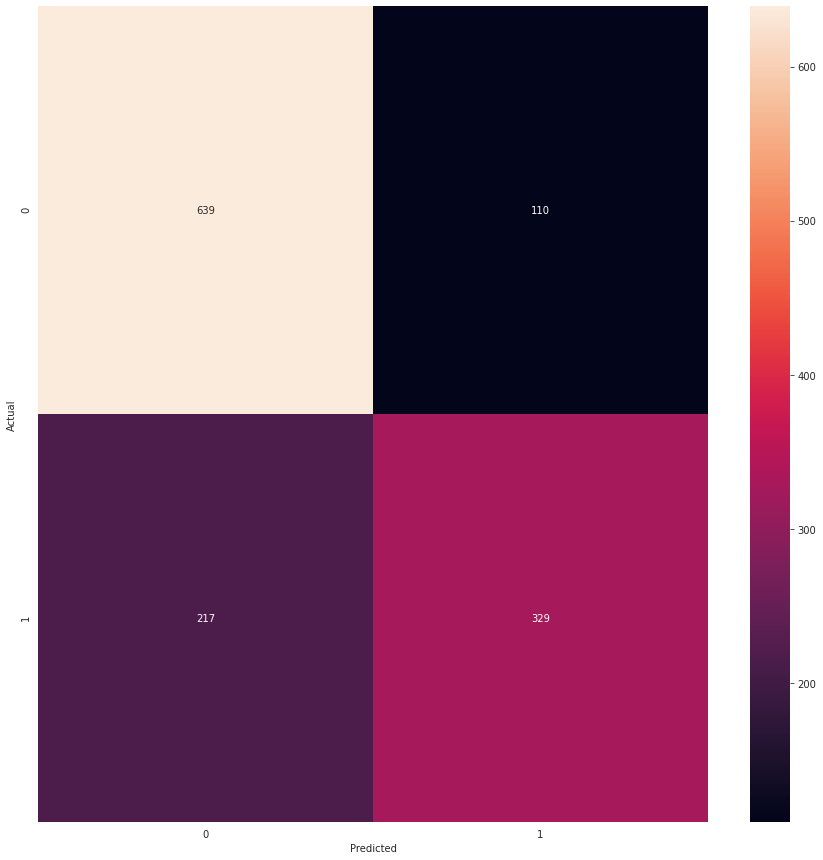

In [50]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluate model
print(round(accuracy_score(y_test, y_pred), 4))
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 5. Other model testing




# Decision Tree with TF-IDF 

In [51]:
from sklearn.tree import DecisionTreeClassifier
# Define classifier
tree = DecisionTreeClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', tree)
                 ])

# Fit model on training set
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(df_X_test)

print('Train Accuracy: ', round(pipe.score(X_train, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test, y_test), 4))

Train Accuracy:  0.9969
Test Accuracy:  0.6355


In [52]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['target']
y_pred_df.to_csv(r'/content/DM_Project_Google/Data/tree_tfidf_sub.csv', index = False)

## KNN Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# Define classifier
knn = KNeighborsClassifier(10)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', tree)
                 ])

# Fit model on training set
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(df_X_test)

print('Train Accuracy: ', round(pipe.score(X_train, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test, y_test), 4))

Train Accuracy:  0.9969
Test Accuracy:  0.6309


In [54]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['target']
y_pred_df.to_csv(r'/content/DM_Project_Google/Data/knn_tfidf_sub.csv', index = False)

## Random Forest with TF-IDF

In [56]:
# Random forest classifier
# Use random forest
from sklearn.ensemble import RandomForestClassifier

# Define classifier
classifier = RandomForestClassifier(n_estimators=50)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Generate Model on training set
pipe.fit(X_train, y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred):.4f}")

CONFUSION MATRIX:
[[629 120]
 [246 300]]
ACCURACY SCORE:
0.7174


## Word2Vec

In [57]:
# Classification using Word2vec

# Tokenize data - same tokenizer function as before
%%time
from gensim.models.doc2vec import TaggedDocument
sample_tagged = X_train.apply(lambda r: TaggedDocument(words=spacy_tokenizer(r['text']), tags=[r.target], axis=1)
#sample_tagged.head(20)

SyntaxError: ignored

In [ ]:
sample_tagged.values[10]

In [ ]:
# Train test split - same split as before
train_tagged, test_tagged = train_test_split(sample_tagged, test_size=0.2, random_state=1234)

train_tagged

In [ ]:

test_tagged

In [ ]:
# Allows to speed up a bit
import multiprocessing
cores = multiprocessing.cpu_count()

In [ ]:
# Define Doc2Vec and build vocabulary
from gensim.models import Doc2Vec

model_dbow = Doc2Vec(dm=0, vector_size=30, negative=6, hs=0, min_count=1, sample=0, workers=cores, epoch=300)
model_dbow.build_vocab([x for x in train_tagged.values])

We now train the distributed bag of words model. In short, it trains a neural network and the optimal weights are the coefficients of the vectors of the documents. Therefore, similar documents will be close to each other in the N-dimentional space (N being the size of the vectors).

In [ ]:
# Train distributed Bag of Word model
model_dbow.train(train_tagged, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)

In [ ]:
# Select X and y
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=100)) for doc in sents])
    return targets, regressors

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [ ]:
# Each document (i.e. complaint) is now a vector in the space of 30 dimentions.
# Similar complaints should have similar vector representation.
X_train[:3]

In [ ]:
# Fit model on training set - same algorithm as before
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate model
print(round(accuracy_score(y_test, y_pred), 4))
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()